# Zomato Restaurant Project

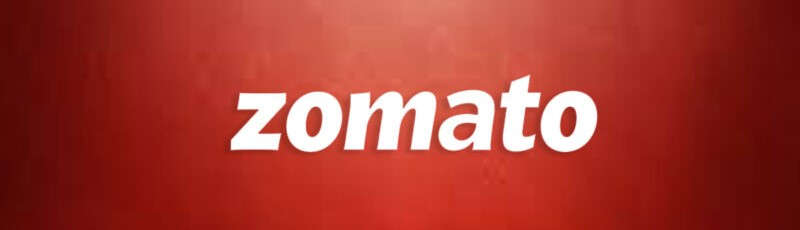

Dataset  

    Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

 

Input features

    This problem statement contains two datasets- Zomato.csv and country_code.csv.
    Country_code.csv contains two variables:
            • Country code
            • Country name

    The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
            • Restaurant Id: Unique id of every restaurant across various cities of the world
            • Restaurant Name: Name of the restaurant
            • Country Code: Country in which restaurant is located
            • City: City in which restaurant is located
            • Address: Address of the restaurant
            • Locality: Location in the city
            • Locality Verbose: Detailed description of the locality
            • Longitude: Longitude coordinate of the restaurant&#39;s location
            • Latitude: Latitude coordinate of the restaurant&#39;s location
            • Cuisines: Cuisines offered by the restaurant
            • Average Cost for two: Cost for two people in different currencies
            • Currency: Currency of the country
            • Has Table booking: yes/no
            • Has Online delivery: yes/ no
            • Is delivering: yes/ no
            • Switch to order menu: yes/no
            • Price range: range of price of food
            • Aggregate Rating: Average rating out of 5
            • Rating color: depending upon the average rating color
            • Rating text: text on the basis of rating of rating
            • Votes: Number of ratings casted by people


Output label  
    
            • Average Cost for two: Cost for two people in different currencies
            • Price range: range of price of food

Aim: 
 
    a) Design a predictive model with the use of machine learning algorithms to predict range of price of food (Classification problem).
    b)  Design a predictive model with the use of machine learning algorithms to predict ost for two people in different currencies(Regression problem).

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset

data1=pd.read_csv(r"C:\Users\gowri\Downloads\zomato.csv", encoding='ISO-8859-1')

data1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# load the dataset

data2=pd.read_excel(r"C:\Users\gowri\Downloads\Country-Code.xlsx")

data2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
# merge both data

zom=pd.merge(data1,data2,on='Country Code')
zom.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Data pre-processing, Feature Engineering & EDA

In [5]:
# create a copy of original dataset for cleaning and analysis

zom_df=zom.copy()

In [6]:
zom_df.shape

(9551, 22)

In [7]:
# check for duplicates

duplicates=zom_df.duplicated()

print('No. of duplicates in the dataset: ', zom_df.duplicated().sum())
print('Index of duplicates in the dataset: ', zom_df[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [8]:
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
# check number of unique values in each column

unique=zom_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [10]:
# take the count of each unique value in each column

for i in zom_df.columns:
    print(zom_df.value_counts(zom_df[i]),'\n')

Restaurant ID
53          1
18264992    1
18264995    1
18264996    1
18264997    1
           ..
307785      1
307786      1
307799      1
307801      1
18500652    1
Name: count, Length: 9551, dtype: int64 

Restaurant Name
Cafe Coffee Day                            83
Domino's Pizza                             79
Subway                                     63
Green Chick Chop                           51
McDonald's                                 48
                                           ..
Ghungroo Club & Bar - By Gautam Gambhir     1
Ghar Ki Handi                               1
Ghar Ka Swad                                1
Ghar Bistro Cafe                            1
íukuraÛôa SofrasÛ±                         1
Name: count, Length: 7446, dtype: int64 

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64 

City


Observation:

    There are 9551 unique restaurant data available in the dataset
    Restaurants at New Delhi appeared the most times
    North Indian cuisines are common in the dataset
    8393 restaurants have no table booking option
    7100 restaurants does not have online delivery
    India has been represented more in the data
    
    Rating color and rating text are different aspects of same feature
    Switch to order menu has same values throughout the dataset, so its not valuable for model training
    We could take country code instead of country for model training
    Locality verbose and locality are different aspects of same feature

In [11]:
zom_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Observation:

    
    The mean> median in Average Cost for two which indicates that it deviates from the normal distribution (right skewness)
    Average Cost for two ranges from 0 - 800000

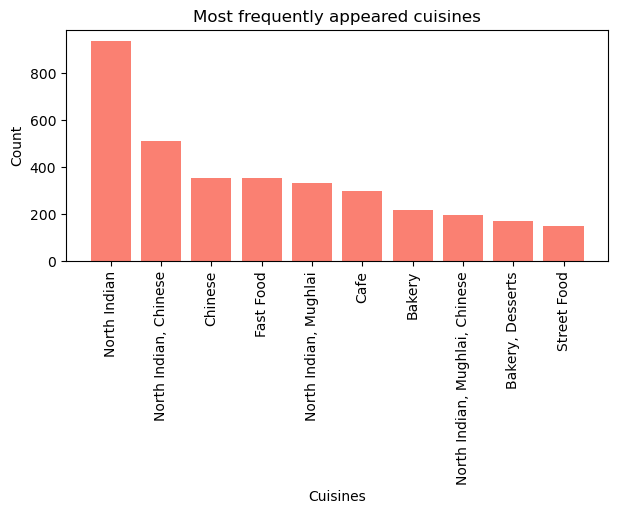

In [13]:
# plot top 10 frequently appearing Cuisines for better visualization

Cuisines=zom_df['Cuisines'].value_counts()
Cuisines_count=Cuisines.head(10)
plt.figure(figsize=(7,3))
plt.bar(Cuisines_count.index, Cuisines_count.values,color='salmon')
plt.title('Most frequently appeared cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
# percentage of most frequently appeared city

Cuisines= len(zom_df[zom_df['Cuisines']=='North Indian'])/len(zom_df['Cuisines'])*100

print(f'% of times North Indian cuisine has appeared in the data : {Cuisines:.2f}%')

% of times North Indian cuisine has appeared in the data : 9.80%


Observation:

    North Indian cuisines have appeared the most (9.8%) in the dataset

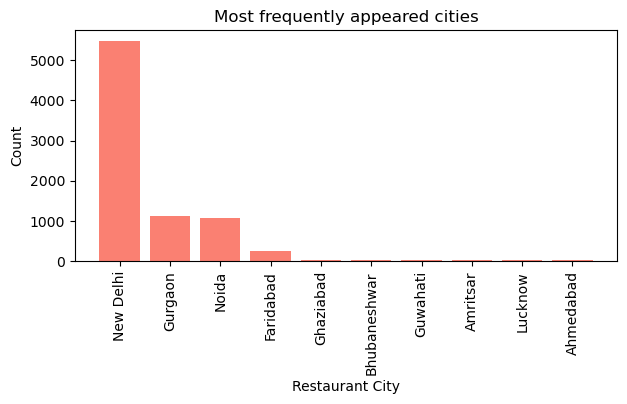

In [15]:
# plot count of Restaurant cities

City=zom_df['City'].value_counts()
City_count=City.head(10)
plt.figure(figsize=(7,3))
plt.bar(City_count.index, City_count.values,color='salmon')

plt.title('Most frequently appeared cities')
plt.xlabel('Restaurant City')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

In [16]:
# percentage of most frequently appeared city

city= len(zom_df[zom_df['City']=='New Delhi'])/len(zom_df['City'])*100

print(f'% of times New Delhi has appeared in the data : {city:.2f}%')

% of times New Delhi has appeared in the data : 57.30%


Observation:

    New Delhi has appeared 57.30% more frequently than other cities

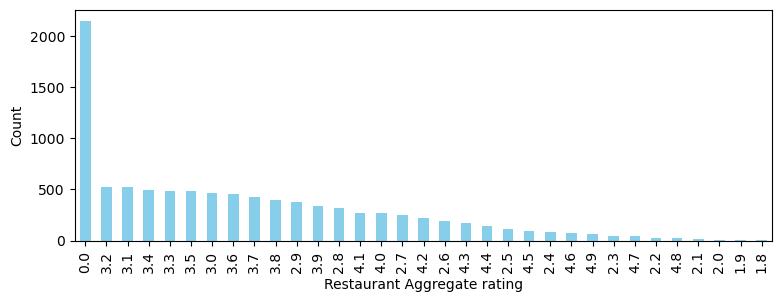

In [17]:
# plot count of Restaurant Categories

plt.figure(figsize=(9,3))
zom_df['Aggregate rating'].value_counts().plot(kind='bar',color='skyblue')
plt.xlabel('Restaurant Aggregate rating')
plt.ylabel('Count')

plt.show()

In [18]:
# percentage of ratings reported

rate= len(zom_df[zom_df['Aggregate rating']==0.0])/len(zom_df['Aggregate rating'])*100

print(f'% of 0.0 ratings reported : {rate:.2f}%')

% of 0.0 ratings reported : 22.49%


Observation:

    In 22.49% cases, no rating/ zero rating was given for the restaurants
    Second frequent rating given was 3.2

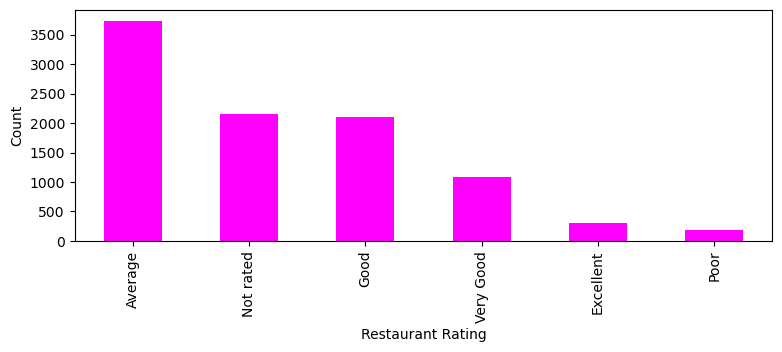

In [19]:
# plot count of Restaurant Categories

plt.figure(figsize=(9,3))
zom_df['Rating text'].value_counts().plot(kind='bar',color='magenta')
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')

plt.show()

In [20]:
# percentage of ratings reported

avgrate= len(zom_df[zom_df['Rating text']=='Average'])/len(zom_df['Rating text'])*100

print(f'% of Average ratings reported : {avgrate:.2f}%')

% of Average ratings reported : 39.13%


Observation:

    In 39.13% cases, average rating was given for the restaurants

In [21]:
# average cost for 2 per country

cost=zom_df.groupby(['Country','Currency'])['Average Cost for two'].mean().reset_index()
cost=cost.sort_values(by='Average Cost for two',ascending=False)
display(cost)

,Country,Currency,Average Cost for two
4,Indonesia,Indonesian Rupiah(IDR),281190.476190
10,Sri Lanka,Sri Lankan Rupee(LKR),2375.000000
6,Phillipines,Botswana Pula(P),1606.818182
3,India,Indian Rupees(Rs.),623.370319
9,South Africa,Rand(R),419.733333
7,Qatar,Qatari Rial(QR),223.750000
12,UAE,Emirati Diram(AED),166.416667
8,Singapore,Dollar($),155.750000
1,Brazil,Brazilian Real(R$),134.666667
11,Turkey,Turkish Lira(TL),84.852941


Observation:

    On an average, two-person meal in India costs around Rs. 623.37

In [22]:
# expensive restaurants in each country

maxcost=zom_df.loc[zom_df.groupby('Country')['Average Cost for two'].idxmax()].reset_index(drop=True)
maxcost=maxcost.sort_values(by='Average Cost for two',ascending=False)
filtered_maxcost=maxcost[['Restaurant Name', 'Country','Average Cost for two' ,'Currency', 'Aggregate rating']]
filtered_maxcost

,Restaurant Name,Country,Average Cost for two,Currency,Aggregate rating
4,Skye,Indonesia,800000,Indonesian Rupiah(IDR),4.1
3,Orient Express - Taj Palace Hotel,India,8000,Indian Rupees(Rs.),4.0
6,Spiral - Sofitel Philippine Plaza Manila,Phillipines,6000,Botswana Pula(P),4.9
10,The Manhattan Fish Market,Sri Lanka,4500,Sri Lankan Rupee(LKR),4.0
9,Restaurant Mosaic @ The Orient,South Africa,3210,Rand(R),4.9
7,Vine - The St. Regis,Qatar,550,Qatari Rial(QR),4.4
8,Restaurant Andre,Singapore,500,Dollar($),3.8
12,Tamba,UAE,500,Emirati Diram(AED),4.7
1,Terraí_o Itíçlia,Brazil,400,Brazilian Real(R$),4.4
11,Nusr-Et,Turkey,400,Turkish Lira(TL),4.1


Observation:

    Orient Express - Taj Palace Hotel is the most expensive restaurant in India with 4.0 rating and average cost for 2 people amounts to Rs. 8000 

In [23]:
# filter out restaurants in India having above average cost for two people meal

avgcost_ind=zom_df[zom_df['Country']=='India']['Average Cost for two'].mean()
above_avgcost_ind= zom_df[(zom_df['Country']=='India')&(zom_df['Average Cost for two']>avgcost_ind)]
above_avgcost_ind

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,No,No,No,No,4,4.0,Green,Very Good,45,India
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,No,No,No,No,4,4.3,Green,Very Good,133,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9260,2800052,The Square - Hotel Novotel,1,Vizag,"Hotel Novotel, Beach Road, Maharani Peta, Vizag","Hotel Novotel, Maharani Peta","Hotel Novotel, Maharani Peta, Vizag",83.315935,17.710690,"Continental, North Indian",...,No,No,No,No,4,4.1,Green,Very Good,125,India
9262,2800856,Barbeque Nation,1,Vizag,"1st Floor, ATR Towers, Harbour Park Road, Pan...",Kirlampudi Layout,"Kirlampudi Layout, Vizag",0.000000,0.000000,"North Indian, Chinese, Mediterranean",...,No,No,No,No,4,4.9,Dark Green,Excellent,345,India
9263,2800911,Double Roti,1,Vizag,"Ground Floor, ATR Towers, Harbour Park Road, P...",Kirlampudi Layout,"Kirlampudi Layout, Vizag",0.000000,0.000000,"Cafe, Fast Food, American",...,No,No,No,No,3,3.8,Yellow,Good,27,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.8,Yellow,Good,74,India


<Figure size 900x300 with 0 Axes>

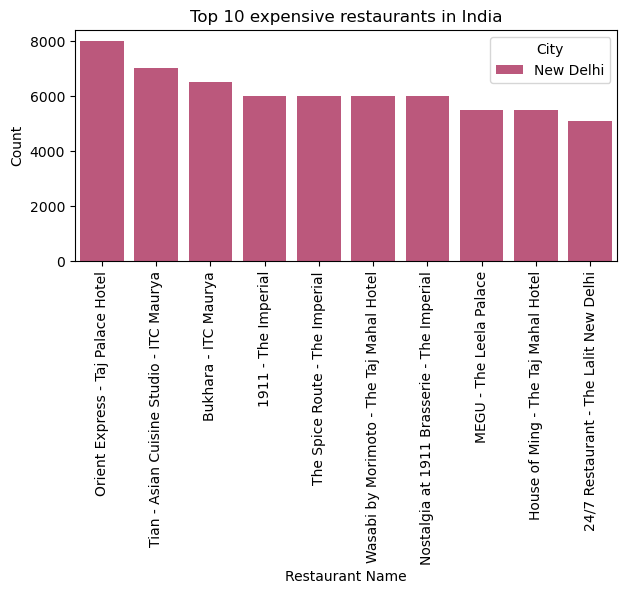

In [24]:
# plot count of Restaurants with above avg cost in India

plt.figure(figsize=(9,3))

top10=above_avgcost_ind.sort_values(by='Average Cost for two',ascending=False).head(10)
plt.figure(figsize=(7,3))
sns.barplot(x='Restaurant Name',y='Average Cost for two',hue='City',data=top10, palette='plasma')
plt.title('Top 10 expensive restaurants in India')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

Observation:

    Top 10 expensive restaurants in India with above average cost for two are located in New Delhi

<Figure size 900x300 with 0 Axes>

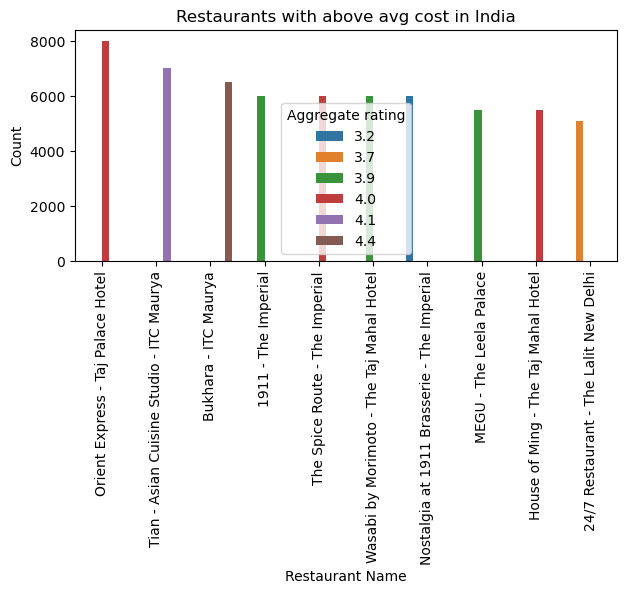

In [25]:
# plot ratings of expensive Restaurants in India

plt.figure(figsize=(9,3))

top10=above_avgcost_ind.sort_values(by='Average Cost for two',ascending=False).head(10)
plt.figure(figsize=(7,3))
sns.barplot(x='Restaurant Name',y='Average Cost for two',hue='Aggregate rating',data=top10)
plt.title('Restaurants with above avg cost in India')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

Observation:

    Top 3 expensive restaurants have 4.0-4.4 rating 

In [26]:
# filter out restaurants in India

ind=zom_df[zom_df['Country']=='India']
ind.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India


In [27]:
# percentage of restaurants in India having table booking option

table= len(ind[ind['Has Table booking']=='Yes'])/len(ind['Has Table booking'])*100

print(f'% of restaurants in India having table booking option : {table:.2f}%')

% of restaurants in India having table booking option : 12.84%


In [28]:
# percentage of restaurants in India having Online delivery option

deli= len(ind[ind['Has Online delivery']=='Yes'])/len(ind['Has Online delivery'])*100

print(f'% of restaurants in India having Online delivery option : {deli:.2f}%')

% of restaurants in India having Online delivery option : 28.01%


In [29]:
# percentage of restaurants in India having delivery option now

delnow= len(ind[ind['Is delivering now']=='Yes'])/len(ind['Is delivering now'])*100

print(f'% of restaurants in India having delivery option now: {delnow:.2f}%')

% of restaurants in India having delivery option now: 0.39%


In [30]:
# percentage of restaurants in India having delivery option now

delnow= len(ind[ind['Is delivering now']=='Yes'])/len(ind['Is delivering now'])*100

print(f'% of restaurants in India having delivery option now: {delnow:.2f}%')

% of restaurants in India having delivery option now: 0.39%


In [31]:
# percentage of restaurants in India having switch to order menu

order= len(above_avgcost_ind[above_avgcost_ind['Switch to order menu']=='No'])/len(above_avgcost_ind['Switch to order menu'])*100

print(f'% of restaurants in India having switch to order menu option : {order:.2f}%')

% of restaurants in India having switch to order menu option : 100.00%


In [32]:
# drop rating color as its same as rating text
# drop switch to order menu has same values throughout the dataset
# drop country as we can use country code instead of country for model training

zom_df.drop(['Rating color','Country','Switch to order menu','Restaurant ID', 'Locality Verbose'],axis=1,inplace=True)

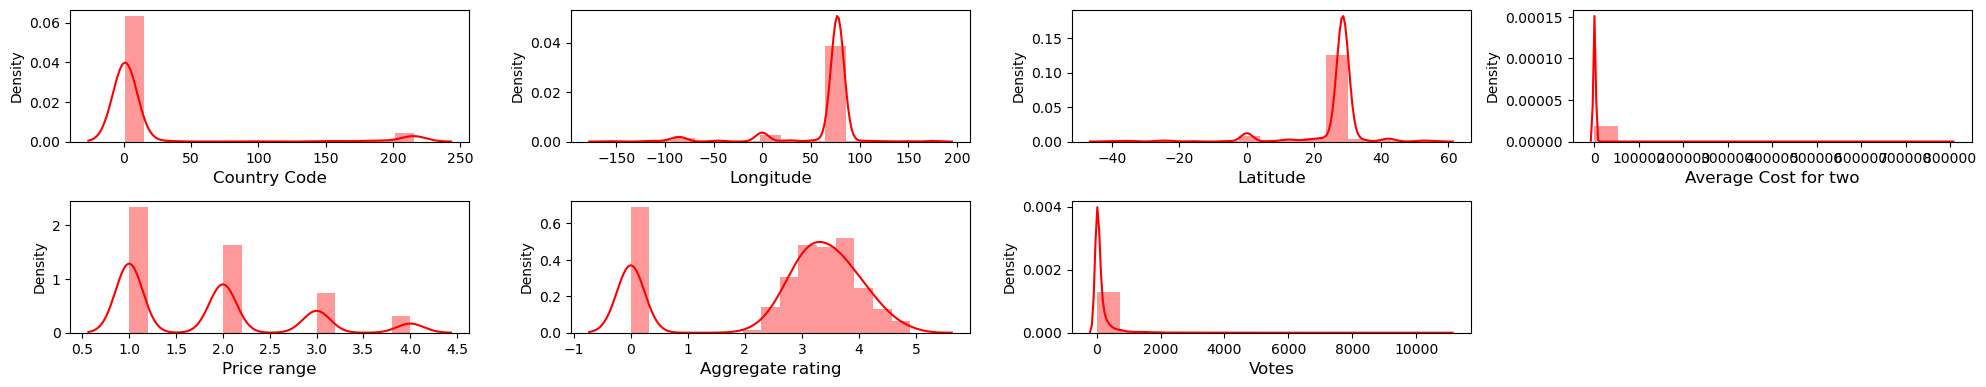

In [33]:
# check data distribution

num=zom_df.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=len(num):
        ax=plt.subplot(8,4,plot)
        sns.distplot(zom_df[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [34]:
num.skew()

Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

    Skewness of Average Cost for two is not handled as its a label column; Its right skewed indicating that majority of the cost lies in the low range
    Location co-ordinates are also not handled for skewness
    Skewness of votes will be handled

In [35]:
zom_df['Votes']=np.cbrt(zom_df['Votes'])
    
print(f'Skewness after transformation: \n{zom_df["Votes"].skew()}')

Skewness after transformation: 
1.204919573186803


skewness has been reduced

In [36]:
# check for nulls

zom_df.isna().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

In [37]:
# fill nulls in Cuisines using mode

zom_df['Cuisines'].fillna(zom_df['Cuisines'].mode()[0],inplace=True)

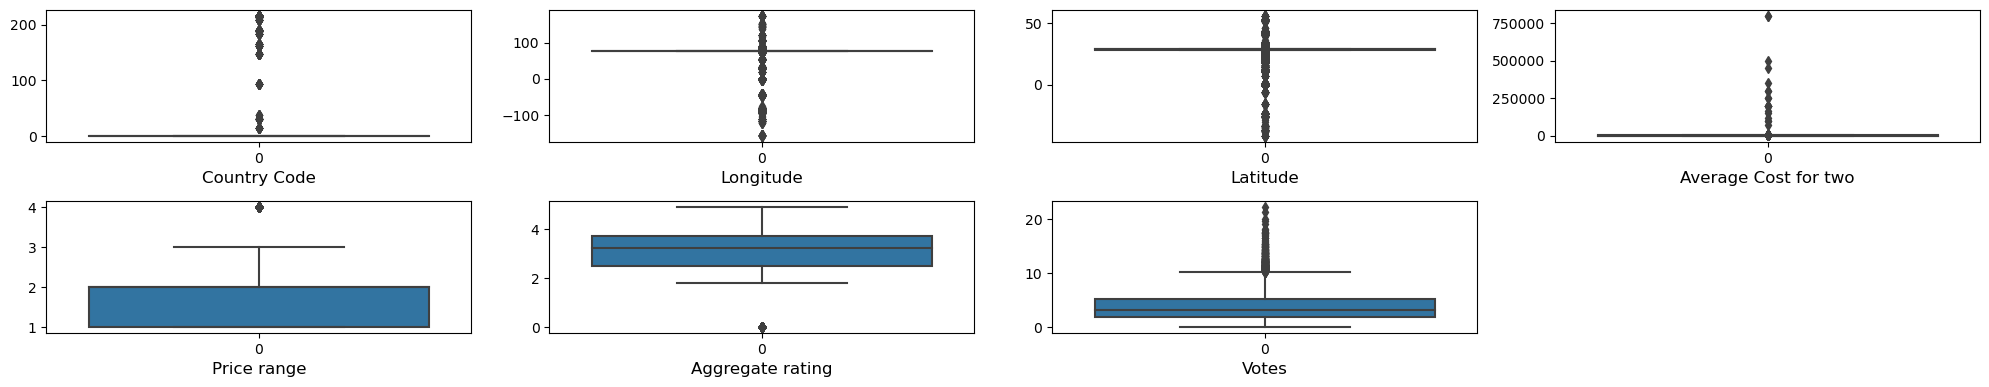

In [38]:
# check for outliers using boxplot

num=zom_df.select_dtypes(include=['int','float'])
plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=len(num):
        ax=plt.subplot(8,4,plot)
        sns.boxplot(zom_df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [39]:
# outlier removal by z-score (votes column)

from scipy.stats import zscore

num_cbrt=np.cbrt(zom_df['Votes'])
z=zscore(num_cbrt)
abs_z=np.abs(z)
filter_z=abs_z<3
zom_df1=zom_df[filter_z]
zom_df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,6.796884
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,8.391942
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,6.463304
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,7.146569
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,6.118033


In [40]:
print('Size of original dataset',zom.shape)
print('Size of dataset after cleaning and pre-processing',zom_df1.shape)
print('Number of rows removed after cleaning and pre-processing',zom.shape[0]-zom_df1.shape[0])
print('Number of columns removed after cleaning and pre-processing',zom.shape[1]-zom_df1.shape[1])

Size of original dataset (9551, 22)
Size of dataset after cleaning and pre-processing (9551, 17)
Number of rows removed after cleaning and pre-processing 0
Number of columns removed after cleaning and pre-processing 5


In [41]:
# create a copy of zom_df1 before encoding

zom_df2=zom_df1.copy()

In [42]:
zom_df2['Latitude']=zom_df2['Latitude'].astype(str)
zom_df2['Longitude']=zom_df2['Longitude'].astype(str)

In [43]:
zom_df2['loc_coord']=zom_df2['Latitude'].astype(str) + ','+ zom_df2['Longitude'].astype(str)
zom_df2.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [44]:
zom_df2.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes', 'loc_coord'],
      dtype='object')

In [45]:
zom_df2.drop(['Address', 'Locality'],axis=1,inplace=True)

In [46]:
zom_df3=zom_df2.copy()

In [47]:
# encode categorical columns

cat=zom_df3.select_dtypes(include='object')
le=LabelEncoder()
for col in cat.columns:
    zom_df3[col]=le.fit_transform(zom_df3[col])
    
zom_df3.head()

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,loc_coord
0,3749,162,73,920,1100,0,1,0,0,3,4.8,1,6.796884,354
1,3173,162,73,1111,1200,0,1,0,0,3,4.5,1,8.391942,352
2,2897,162,75,1671,4000,0,1,0,0,4,4.4,5,6.463304,358
3,4707,162,75,1126,1500,0,0,0,0,4,4.9,1,7.146569,361
4,5523,162,75,1122,1500,0,1,0,0,4,4.8,1,6.118033,360


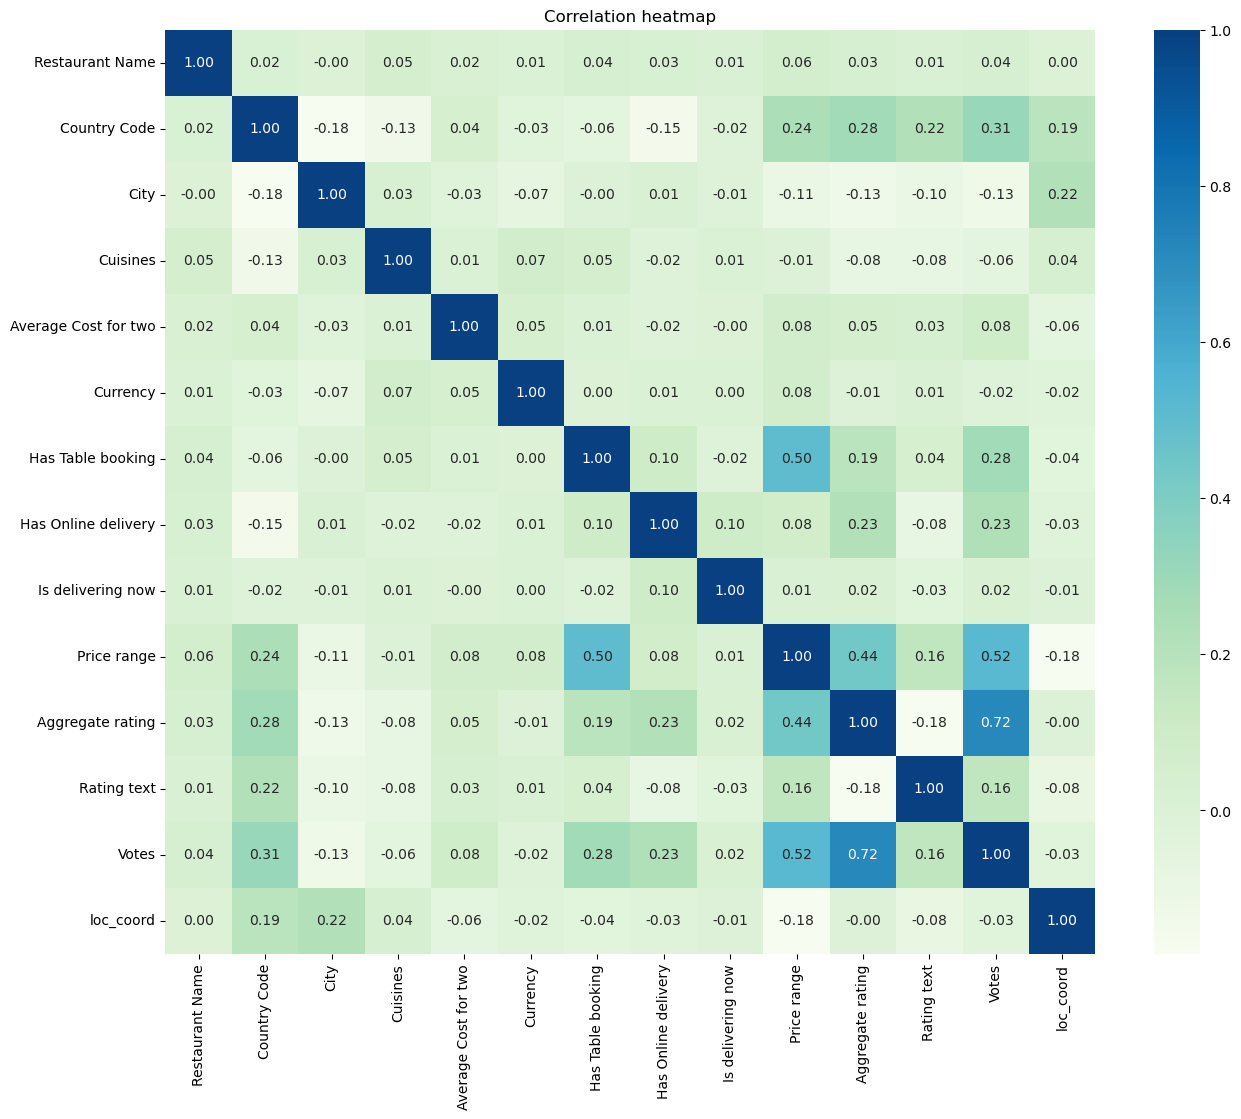

In [48]:
# check for correlation

cm= zom_df3.corr()
plt.figure(figsize=(15,12))

sns.heatmap(cm, annot=True,cmap='GnBu',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:    
    
   Price range:-

       Moderate Positive correlation with votes, aggregate rating, table booking and country code
            
   Average Cost for two:-
       
       Low correlation with all the features
       
   High Multicollinearity exists between:-
   
       Votes and aggregate rating
       Country code and longitude
       
       
We could use VIF score to eliminate highly correlated features so that multicollinearity is reduced in the dataset

# Feature Selection

# Feature Selection for classification model to predict Price range

In [49]:
# confirm multicollinearity by vif for classification Model

x=zom_df3.drop(['Price range'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
11,Votes,2.756966
9,Aggregate rating,2.748693
1,Country Code,1.424768
10,Rating text,1.398710
7,Has Online delivery,1.153662
12,loc_coord,1.146524
2,City,1.128480
6,Has Table booking,1.121228
3,Cuisines,1.042441
4,Average Cost for two,1.015950


All features have acceptable vif scores indicating minimal multicollinearity

In [50]:
X=zom_df3.drop(['Price range'],axis=1)
Y=zom_df3['Price range']

In [51]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=67)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(7163, 13) (7163,) (2388, 13) (2388,)


<Axes: xlabel='Price range', ylabel='count'>

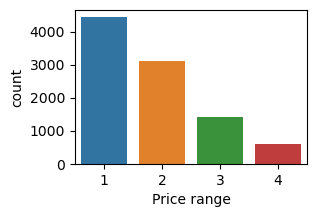

In [52]:
# checking for data imbalance

plt.figure(figsize=(3,2))
sns.countplot(x='Price range',data=zom_df3)

Observation:  
    There is significant imbalance in the data. Since the dataset is small, we can use oversampling to rectify it.

In [53]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(X_train,Y_train)

In [54]:
# check label distribution after oversampling
from collections import Counter
print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution after oversampling:  Counter({1: 3330, 2: 3330, 3: 3330, 4: 3330})


In [55]:
# check shape of train and test sets after oversampling

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data a/f smote:  (13320, 13) and no. of label data a/f smote:  (13320,)


Text(0.5, 1.0, 'Label distribution after oversampling')

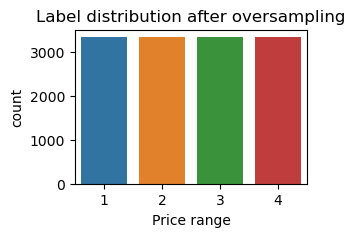

In [56]:
ytrain_df=pd.DataFrame(Y_train,columns=['Price range'])
plt.figure(figsize=(3,2))
sns.countplot(x='Price range', data=ytrain_df)
plt.title('Label distribution after oversampling')

Observation:  
    
    Now the dataset is balanced, and can be used for model building

# Feature Selection for regression model to predict average cost for two

In [57]:
# confirm multicollinearity by vif for classification Model

x=zom_df3.drop(['Average Cost for two'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
11,Votes,2.826489
9,Aggregate rating,2.823939
8,Price range,1.960907
1,Country Code,1.483718
5,Has Table booking,1.446002
10,Rating text,1.417495
12,loc_coord,1.214008
6,Has Online delivery,1.153858
2,City,1.131059
3,Cuisines,1.044303


There is minimal multicollinearity as indicated by the low vif scores

In [60]:
# finding best features using SelectKBest

best=SelectKBest(score_func=f_classif,k='all')
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
selected_features=selectkbest.sort_values(by='Score',ascending=False)
display(selected_features)

,Features,Score
8,Price range,399.678183
1,Country Code,257.630181
5,Has Table booking,70.831302
11,Votes,38.515881
4,Currency,27.227608
9,Aggregate rating,21.799627
6,Has Online delivery,10.853055
12,loc_coord,10.005902
10,Rating text,6.980009
2,City,4.549936


We can select top 5 the features for training purpose.

In [93]:
cols=['Price range','Country Code','Has Table booking','Votes','Currency']
x=zom_df2[cols]
y=zom_df2['Average Cost for two']

cat=x.select_dtypes(include='object')
x_encoded = pd.get_dummies(x, columns=cat.columns, drop_first=True)

In [152]:
x_encoded=x_encoded.astype(int)
x_encoded.head(2)

,Price range,Country Code,Votes,Has Table booking_Yes,Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(£),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL)
0,3,162,6,1,0,0,0,0,0,0,0,0,0,0,0
1,3,162,8,1,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# transforming and splitting training and testing sets

x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7163, 15) (7163,) (2388, 15) (2388,)


# MODEL BUILDING & VALIDATION

# MODEL BUILDING & VALIDATION for classification model to predict Price range

In [154]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,X_test,Y_test,train=True):
    if train:
        Y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,Y_pred1))
    else:
        Y_pred2= model.predict(X_test)
        print('Accuracy of test set: ',accuracy_score(Y_test,Y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(Y_test,Y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(Y_test,Y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='cividis',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,X,Y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.6350600600600601
Accuracy of test set:  0.6612227805695142

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           1       0.79      0.81      0.80      1114
           2       0.62      0.52      0.57       774
           3       0.57      0.49      0.52       353
           4       0.35      0.69      0.46       147

    accuracy                           0.66      2388
   macro avg       0.58      0.63      0.59      2388
weighted avg       0.67      0.66      0.66      2388



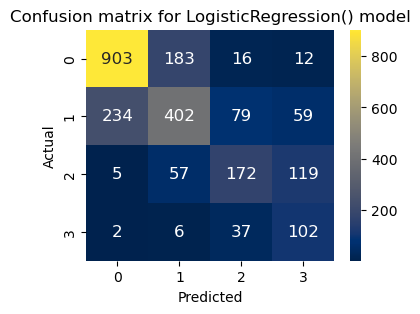


Cross validation score of the LogisticRegression() model : 0.7106211215859682


In [142]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,X_test,Y_test,train=True)
score(lr,X_train,Y_train,X_test,Y_test,train=False)

cv(lr)

Accuracy of train set:  0.8605105105105105
Accuracy of test set:  0.5749581239530989

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           1       0.74      0.67      0.70      1114
           2       0.49      0.47      0.48       774
           3       0.44      0.52      0.48       353
           4       0.38      0.56      0.45       147

    accuracy                           0.57      2388
   macro avg       0.51      0.55      0.53      2388
weighted avg       0.59      0.57      0.58      2388



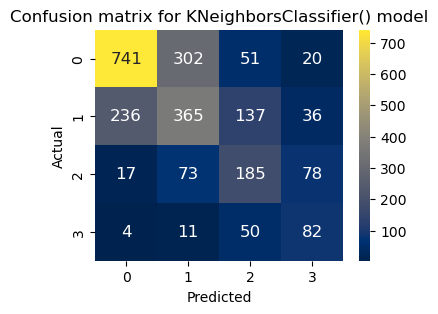


Cross validation score of the KNeighborsClassifier() model : nan


In [143]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,X_test,Y_test,train=True)
score(knn,X_train,Y_train,X_test,Y_test,train=False)
cv(knn)

Accuracy of train set:  1.0
Accuracy of test set:  0.9685929648241206

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           1       1.00      0.99      0.99      1114
           2       0.98      0.97      0.98       774
           3       0.92      0.92      0.92       353
           4       0.85      0.89      0.87       147

    accuracy                           0.97      2388
   macro avg       0.93      0.94      0.94      2388
weighted avg       0.97      0.97      0.97      2388



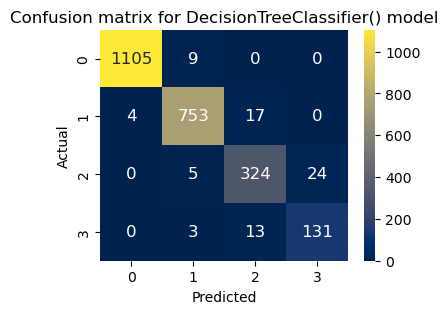


Cross validation score of the DecisionTreeClassifier() model : 0.8430965394615357


In [144]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,X_test,Y_test,train=True)
score(dt,X_train,Y_train,X_test,Y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.9769681742043551

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1114
           2       0.98      0.98      0.98       774
           3       0.92      0.95      0.94       353
           4       0.93      0.91      0.92       147

    accuracy                           0.98      2388
   macro avg       0.96      0.96      0.96      2388
weighted avg       0.98      0.98      0.98      2388



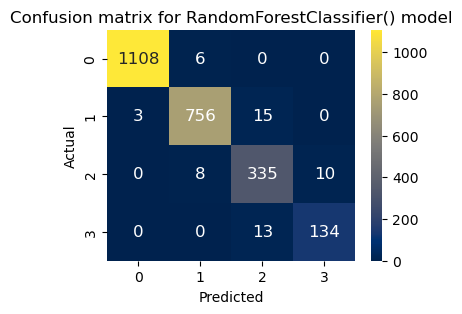


Cross validation score of the RandomForestClassifier() model : 0.9061053531360189


In [145]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,X_test,Y_test,train=True)
score(rf,X_train,Y_train,X_test,Y_test,train=False)
cv(rf)

Accuracy of train set:  0.7125375375375376
Accuracy of test set:  0.6319095477386935

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           1       0.76      0.76      0.76      1114
           2       0.57      0.46      0.51       774
           3       0.50      0.62      0.55       353
           4       0.43      0.63      0.51       147

    accuracy                           0.63      2388
   macro avg       0.56      0.62      0.58      2388
weighted avg       0.64      0.63      0.63      2388



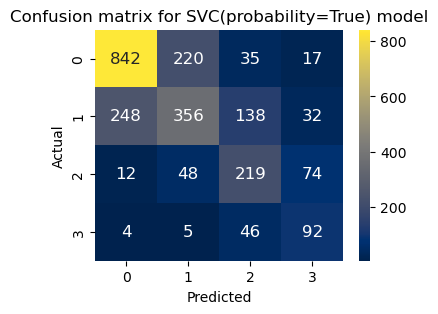


Cross validation score of the SVC(probability=True) model : 0.7205606559982028


In [146]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,X_test,Y_test,train=True)
score(svc,X_train,Y_train,X_test,Y_test,train=False)
cv(svc)

Accuracy of train set:  0.9878378378378379
Accuracy of test set:  0.9719430485762144

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1114
           2       0.97      0.97      0.97       774
           3       0.93      0.92      0.92       353
           4       0.90      0.96      0.93       147

    accuracy                           0.97      2388
   macro avg       0.95      0.96      0.95      2388
weighted avg       0.97      0.97      0.97      2388



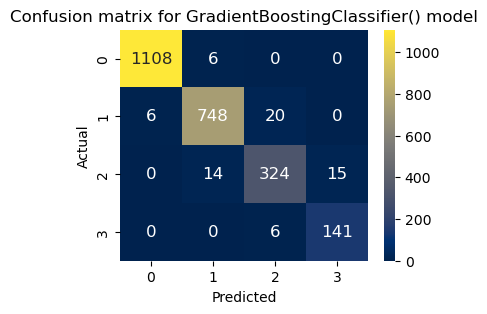


Cross validation score of the GradientBoostingClassifier() model : 0.8594295358094909


In [147]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,X_test,Y_test,train=True)
score(gbc,X_train,Y_train,X_test,Y_test,train=False)
cv(gbc)

Observations:  
    
    Random Forest (rf) model is selected as the best model on account of higher cross validation score. It has closer values of test and train accuracy indicating less overfitting. 
    The rf model has the following score metrics:
    
        Accuracy of train set:  1.0
        Accuracy of test set:  0.97
        Cross validation score : 0.90
As the test metrics are high, hyperparameter tuning is not done

In [165]:
# Save model

pickle.dump(rf, open('Price_level_prediction_rf_model.pkl','wb'))

In [166]:
# load model and view prediction vs actual Price_level

Price_level_prediction_model=pickle.load(open('Price_level_prediction_rf_model.pkl','rb'))
Y_pred=Price_level_prediction_model.predict(X_test)

result=pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
result.head()

,Predicted,Actual
6847,2,2
2719,1,1
8365,2,2
7732,2,2
8920,1,1


Observation:

    The Random Forest (rf) model has predicted the price range with 97% accuracy!

# MODEL BUILDING & VALIDATION for regression model to predict average cost for two

In [107]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    model_metrics=[]
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        print('R2 score: ',r2_score(y_test,y_pred2))


In [108]:
# linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.933136703255271


In [109]:
# Lasso

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
score(lasso,x_train,y_train,x_test,y_test,train=True)
score(lasso,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.933363694402549


In [110]:
# Ridge

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
score(ridge,x_train,y_train,x_test,y_test,train=True)
score(ridge,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9373203496832702


In [111]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.650461061468396


In [129]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7332348781335707


In [130]:
# XGBoost

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.6504644832005975


In [131]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        
        y_train_pred= model.predict(x_train)
        tr=r2_score(y_train,y_train_pred)

        y_test_pred= model.predict(x_test)
        ts=r2_score(y_test,y_test_pred)
        
        mse=mean_squared_error(y_test,y_test_pred)
        mae=mean_absolute_error(y_test,y_test_pred)
        cv=cross_val_score(model,x_encoded,y,cv=5).mean()
        
        diff = abs(ts-cv)
        model_metrics.append({'Model':name, 'Train R2 score':tr,'Test R2 score':ts, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='Test R2 score' ,ascending=False)

In [132]:
models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge,'Decision Tree':dtr, 'Random Forest':rfr,'XGBoost':xgbr }

evaluation(models)

,Model,Train R2 score,Test R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
2,Ridge,0.627391,0.937320,7.656523e+06,399.336601,-227.345108,228.282428
1,Lasso,0.630024,0.933364,8.139841e+06,335.592192,0.456080,0.477283
0,Linear Regression,0.630038,0.933137,8.167569e+06,332.269346,-241.944277,242.877413
4,Random Forest,0.723884,0.718247,3.441705e+07,343.730758,0.600137,0.118110
5,XGBoost,0.734770,0.650464,4.269690e+07,363.368524,0.528654,0.121811
3,Decision Tree,0.734770,0.650461,4.269732e+07,362.788892,0.594648,0.055813


Observation:

    We can select Random Forest as it has comparitively better cross-validation score of 0.617 and shows less overfitting as train and test r2 scores are near. The error scores (MAE & MSE) are also less

In [121]:
# Hyperparameter tuning of the selected model (Random Forest) using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250], 'max_depth':range(1,30,5), 
        'min_samples_leaf':[1,2,4], 'max_leaf_nodes':[10,15,20]}

rs=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 50, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_depth': 16} and best score is : nan


In [137]:
# Tuned Random Forest model

rf1=rs.best_estimator_

rf1.fit(X_train,Y_train)

score(rf1,X_train,Y_train,X_test,Y_test,train=True)
score(rf1,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.9500209639861715


In [148]:
# get metrics of tuned model 

models={'Tuned Random Forest1':rf1}

evaluation(models)

,Model,Train R2 score,Test R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
0,Tuned Random Forest1,0.722436,0.703761,3.618650e+07,432.428473,0.319525,0.384237


Observation:

    Hyperparameter tuning has reduced the r2 score and cv score. So we can select the untuned Random Forest model with the following metrics:

       * Test R2 score: 0.718
       * Train R2 score: 0.723
       * Cross Validation: 0.600

The Random Forest model is the better model as it provides a good balance between overfitting and generalization

In [149]:
# Save Random Forest model

pickle.dump(rfr, open('Average_cost_prediction_rfr_model.pkl','wb'))

In [151]:
# load model and view prediction vs actual Price

Average_cost_prediction_model=pickle.load(open('Average_cost_prediction_rfr_model.pkl','rb'))
y_pred=Average_cost_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.head()

,Predicted,Actual
6847,614.443930,800
2719,266.413703,300
8365,592.484589,500
7732,616.954695,600
8920,257.882817,250


# Overall Summary

The dataset on "Zomato Restaurant" was used to analyse and build machine learning models to :    
a) Design a predictive model with the use of machine learning algorithms to predict range of price of food (Classification problem).  
b)  Design a predictive model with the use of machine learning algorithms to predict ost for two people in different currencies(Regression problem).


Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, outlier removal, managing skewness
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering - creation of new columns such as location co-ordinates for data analysis and modelling purpose; scaling of data
4. Model training and evaluation- trained 7 models each for the regression and classification problems; evaluated the models using appropriate metrics to find the best model


# Data Insights

DESCRIPTIVE ANALYSIS:

    There are 9551 unique restaurant data available in the dataset
    Restaurants at New Delhi appeared the most times
    North Indian cuisines are common in the dataset
    8393 restaurants have no table booking option
    7100 restaurants does not have online delivery
    India has been represented more in the data


INFERENTIAL ANALYSIS:
    
    North Indian cuisines have appeared the most (9.8%) in the dataset
    New Delhi has appeared 57.30% more frequently than other cities
    In 22.49% cases, no rating/ zero rating was given for the restaurants
    Second frequent rating given was 3.2
    In 39.13% cases, average rating was given for the restaurants
    On an average, two-person meal in India costs around Rs. 623.37
    Orient Express - Taj Palace Hotel is the most expensive restaurant in India with 4.0 rating and average cost for 2 people amounts to Rs. 8000
    Top 10 expensive restaurants in India with above average cost for two are located in New Delhi
    % of restaurants in India having table booking option : 12.84%
    % of restaurants in India having Online delivery option : 28.01%
    % of restaurants in India having delivery option now: 0.39%
    % of restaurants in India having delivery option now: 0.39%
    % of restaurants in India having switch to order menu option : 100.00%

    

# Selected models



* Predict range of price of food (Classification problem).

    Random Forest (rf) model is selected as the best model on account of higher cross validation score. It has closer values of test and train accuracy indicating less overfitting. 
    The rf model has the following score metrics:

    * Accuracy of train set:  1.0
    * Accuracy of test set:  0.97
    * Cross validation score : 0.90

  
  
  
* Predict average cost for two people (Regression problem).

    The Random Forest model is selected as the best model with the following metrics:

   * Test R2 score: 0.718
   * Train R2 score: 0.723
   * Cross Validation: 0.600